In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time as time
import itertools


In [ ]:
df = pd.read_csv('fifa.csv')
df

In [ ]:
df['position'] = np.where(df['position'] == 'CB', 'Defender', df['position'])
df['position'] = np.where(df['position'] == 'LB', 'Defender', df['position'])
df['position'] = np.where(df['position'] == 'RB', 'Defender', df['position'])
df['position'] = np.where(df['position'] == 'RWB', 'Defender', df['position'])
df['position'] = np.where(df['position'] == 'LWB', 'Defender', df['position'])
df['position'] = np.where(df['position'] == 'GK', 'Defender', df['position'])

In [ ]:
df['league_name'] = np.where(df['league_name'] == 'French Ligue 1', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'German 1. Bundesliga', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'English Premier League', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'Spain Primera Division', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'Italian Serie A', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'Campeonato Brasileiro S√©rie A', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'Portuguese Liga ZON SAGRES', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'Holland Eredivisie', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'Mexican Liga MX', 'yes', df['league_name'])
df['league_name'] = np.where(df['league_name'] == 'Turkish S√ºper Lig', 'yes', df['league_name'])

In [ ]:
fifa = df.loc[df['position'] != 'Defender']
fifa = fifa.loc[fifa['league_name'] == 'yes']
fifa

In [ ]:
train = fifa.sample(frac=0.8)
test = fifa.drop(train.index)

In [ ]:
df.corr()

In [ ]:
sns.regplot(x = 'weight', y = 'pace', data = df,scatter_kws={"color": "orange"}, line_kws={"color": "blue"}) #Visualizing data

The code above was necessary to build the code below 

In [27]:
model = sm.ols(formula = 'np.log(value_eur)~pace+shooting+passing+dribbling+physic+age+height+weight', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(value_eur)   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1540.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:49:29   Log-Likelihood:                -1421.0
No. Observations:                1980   AIC:                             2860.
Df Residuals:                    1971   BIC:                             2910.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6370      0.458      3.574      0.000       0.739       2.535
pace          -0.0026      0.001     -1.773      0.076      -0.005       0.000
shooting       0.0284      0.002     15.749      0.000       0.025       0.032
passing        0.0294      0.002     12.347      0.000       0.025       0.034
dribbling      0.1035      0.004     28.651      0.000       0.096       0.111
physic         0.0387      0.002     25.593      0.000       0.036       0.042
age           -0.0794      0.003    -22.877      0.000      -0.086      -0.073
height         0.0139      0.003      4.951      0.000       0.008       0.019
weight        -0.0073      0.003     -2.574      0.010      -0.013      -0.002
==============================================================================
Omnibus:                       48.086   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.548
Skew:                           0.346   Prob(JB):                     2.36e-12
Kurtosis:                       3.411   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model2 = sm.ols(formula = 'np.log(value_eur)~shooting+passing+dribbling+skill_moves+height+physic+age', data = train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(value_eur)   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1767.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:49:30   Log-Likelihood:                -1418.4
No. Observations:                1980   AIC:                             2853.
Df Residuals:                    1972   BIC:                             2898.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4448      0.425      3.396      0.001       0.610       2.279
shooting        0.0278      0.002     15.725      0.000       0.024       0.031
passing         0.0315      0.002     14.371      0.000       0.027       0.036
dribbling       0.1074      0.004     30.102      0.000       0.100       0.114
skill_moves    -0.0895      0.023     -3.826      0.000      -0.135      -0.044
height          0.0111      0.002      4.923      0.000       0.007       0.015
physic          0.0366      0.001     25.330      0.000       0.034       0.039
age            -0.0787      0.003    -23.747      0.000      -0.085      -0.072
==============================================================================
Omnibus:                       45.395   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.378
Skew:                           0.335   Prob(JB):                     1.15e-11
Kurtosis:                       3.402   Cond. No.                     8.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
prediction = model.predict(test)
print(np.sqrt(((test.value_eur - np.exp(prediction))**2).mean()))
print(np.abs(test.value_eur - np.exp(prediction)).mean())
print(np.exp(prediction).mean())

8562095.534141205
3546521.3463665163
7308220.218034425


Text(0, 0.5, 'Predicted value')

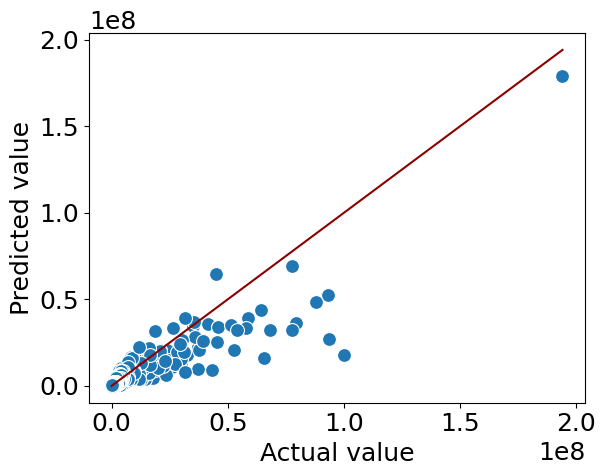

In [94]:
sns.scatterplot(x = test.value_eur, y = np.exp(prediction))
#In case of a perfect prediction, all the points must lie on the line x = y.
sns.lineplot(x = [0,test.value_eur.max()], y = [0,test.value_eur.max()],color='darkred') #Plotting the line x = y.
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

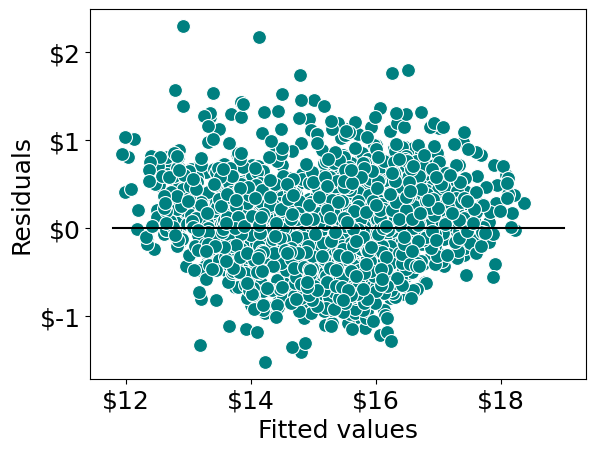

In [95]:
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'teal')
sns.lineplot(x = [prediction.min(),prediction.max()],y = [0,0],color = 'black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')